In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [6]:
mr1 = {'0': 2, '1': 23}
mr2 = {'0': 4, '1': 21}
mr3 = {'0': 1, '1': 24}
mr4 = {'0': 6, '1': 19}
mr5 = {'0': 11, '1': 14}
mr6 = {'0': 12, '1': 13}


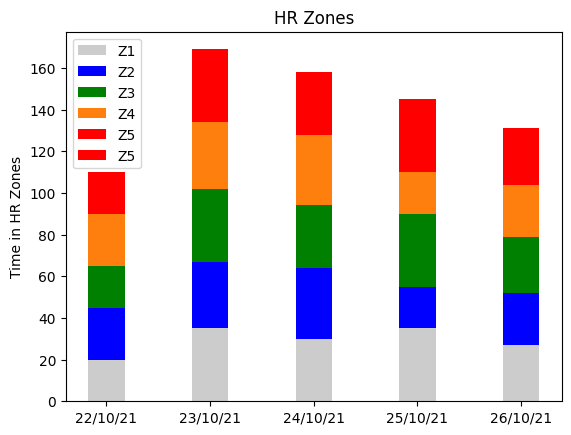

In [7]:
import matplotlib.pyplot as plt
import numpy as np


dates = ['22/10/21', '23/10/21', '24/10/21', '25/10/21', '26/10/21']
z1 = np.array([20, 35, 30, 35, 27])
z2 = np.array([25, 32, 34, 20, 25])
z3 = np.array([20, 35, 30, 35, 27])
z4 = np.array([25, 32, 34, 20, 25])
z5 = np.array([20, 35, 30, 35, 27])
z6 = np.array([20, 35, 30, 35, 27])



width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(dates, z1, width, color='0.8', label='Z1')
ax.bar(dates, z2, width, color='b', label='Z2',bottom=z1)
ax.bar(dates, z3, width, color='g', label='Z3',bottom=z1 + z2)
ax.bar(dates, z4, width, color='tab:orange', label='Z4',bottom=z1 + z2 + z3)
ax.bar(dates, z5, width, color='r', bottom=z1 + z2 + z3 + z4, label='Z5')
ax.bar(dates, z5, width, color='r', bottom=z1 + z2 + z3 + z4, label='Z5')


ax.set_ylabel('Time in HR Zones')
ax.set_title('HR Zones')
ax.legend()

plt.show()

<AxesSubplot:title={'center':'multiple stacked bar plot'}>

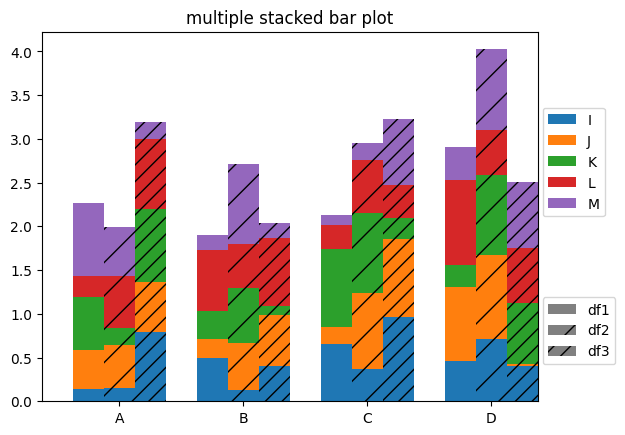

In [10]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0.2,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])

# Then, just call :
plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])
    